In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Predict canada's per capita income in year 2020. \
<b> canada_per_capita_income.csv </b> \
Using this build a regression model and predict the per capita income fo canadian citizens in year 2020

In [2]:
df = pd.read_csv('canada_per_capita_income.csv')

In [3]:
df.rename(columns={'per capita income (US$)': 'per_capita_income_US'}, inplace=True)

In [4]:
df.head(5)

,year,per_capita_income_US
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


### Separating the year and capita column in two different ways

In [5]:
year = df.drop('per_capita_income_US',axis='columns')
df_year = year.to_numpy()

In [6]:
capita = df.per_capita_income_US
df_capita = capita.to_numpy()

### Using LinearRegression and Fit to Train Model in Linear Regression 

In [7]:
reg = linear_model.LinearRegression()
reg.fit(df_year,df_capita)

LinearRegression()

In [8]:
reg.predict([[2020]]) 

array([41288.69409442])

In [9]:
reg.coef_ #y = mx+c

array([828.46507522])

In [10]:
reg.intercept_

-1632210.7578554575

### Creating a new pd.DataFrame to capture the linear regression line in the plot of the data

In [32]:
my_df = pd.DataFrame(columns=['year','capita'])
my_df    

,year,capita


In [33]:
year = 1970
i = 0
for i in range(50):
    year = year + 1
    #print(year)
    capita = reg.predict([[year]])
    #print(capita)
    my_df = my_df.append({'year':year, 'capita':capita}, ignore_index=True) 
    my_df.to_numpy()

C:\Users\sunam\AppData\Local\Temp\ipykernel_15636\2869463130.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df.append({'year':year, 'capita':capita}, ignore_index=True)
C:\Users\sunam\AppData\Local\Temp\ipykernel_15636\2869463130.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df.append({'year':year, 'capita':capita}, ignore_index=True)
C:\Users\sunam\AppData\Local\Temp\ipykernel_15636\2869463130.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df.append({'year':year, 'capita':capita}, ignore_index=True)
C:\Users\sunam\AppData\Local\Temp\ipykernel_15636\2869463130.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

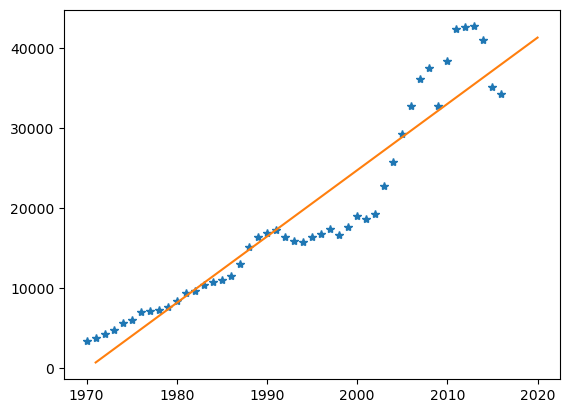

In [34]:
plt.plot(df.year,df.per_capita_income_US,linestyle='',marker='*')
plt.plot(my_df.year,my_df.capita)

In [35]:
my_df.to_csv("estimated_canada_per_capita_income.csv")